#  **Assignment_2: Ensemble Methods for Classification**

### A classifier model to predict the credit card defaulter for given dataset 

## **1. Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing LabelEncoder from sci-kit learn
from sklearn.preprocessing import LabelEncoder

# Importing StandardScalar
from sklearn.preprocessing import StandardScaler

# Importing the train_test_split
from sklearn.model_selection import train_test_split

# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing libraries for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Importing XGBoost
import xgboost as xgb

In [7]:
df = pd.read_csv('credit_card_defaulter.csv',index_col=0)

## **2. Data Visuatlization & Augmentation**

### Understanding The Data

In [8]:
df.head()  #checking the data

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


In [9]:
df.info() #To get the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [11]:
df.describe() #to get the statistical summary of the numerical data

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


### **Exploratory Data Analysis**

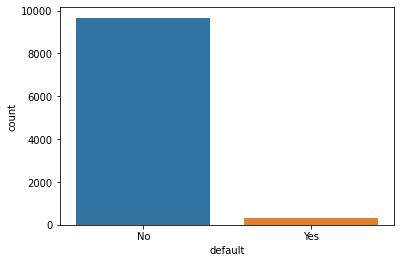

In [14]:
sns.countplot(x='default',data=df)
# to show the counts of the records of the defaulter

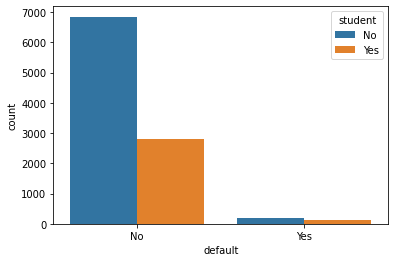

In [15]:
sns.countplot(x='default',hue='student',data=df)

#### Highly imbalanced data. So we would balance to proceed further

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


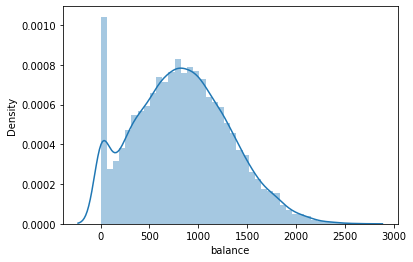

In [16]:
sns.distplot(df['balance'], kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


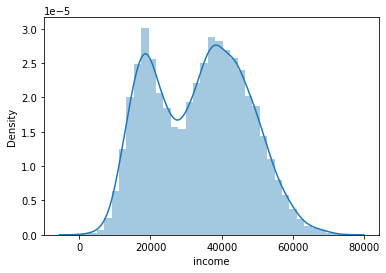

In [17]:
sns.distplot(df['income'],hist=True)

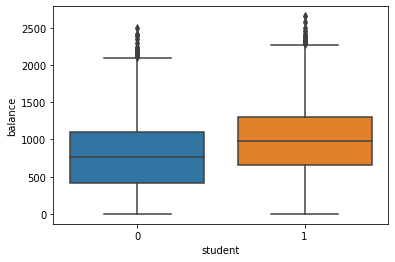

In [46]:
sns.boxplot(data=df,x="student",y="balance")

#distribution of income in the defaulters and non defaulters group

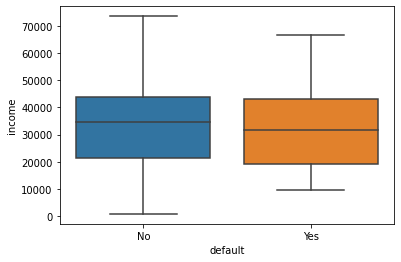

In [20]:
sns.boxplot(x='default',y='income',data=df)

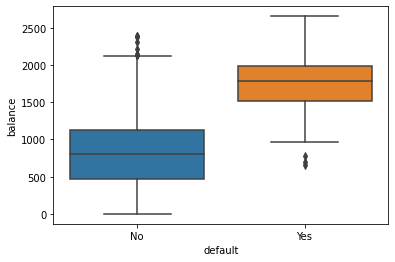

In [21]:
sns.boxplot(x='default',y='balance',data=df)

### Looking for Missing Values:

In [22]:
df.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

#### There is no missing value in the dataset

### Preparing The Data:

### Label Encoding:

In [23]:
from sklearn import preprocessing

In [24]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
df['default']= label_encoder.fit_transform(df['default'])

In [26]:
df['student']= label_encoder.fit_transform(df['student'])

In [27]:
df.head

<bound method NDFrame.head of        default  student      balance       income
1            0        0   729.526495  44361.62507
2            0        1   817.180407  12106.13470
3            0        0  1073.549164  31767.13895
4            0        0   529.250605  35704.49394
5            0        0   785.655883  38463.49588
...        ...      ...          ...          ...
9996         0        0   711.555020  52992.37891
9997         0        0   757.962918  19660.72177
9998         0        0   845.411989  58636.15698
9999         0        0  1569.009053  36669.11236
10000        0        1   200.922183  16862.95232

[10000 rows x 4 columns]>

In [29]:
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.62507
2,0,1,817.180407,12106.13470
3,0,0,1073.549164,31767.13895
4,0,0,529.250605,35704.49394
5,0,0,785.655883,38463.49588


### features and target class:

In [30]:
X = df.drop('default',axis=1) # Features for predicting
y = df['default'] # Target class

In [32]:
print(X)

       student      balance       income
1            0   729.526495  44361.62507
2            1   817.180407  12106.13470
3            0  1073.549164  31767.13895
4            0   529.250605  35704.49394
5            0   785.655883  38463.49588
...        ...          ...          ...
9996         0   711.555020  52992.37891
9997         0   757.962918  19660.72177
9998         0   845.411989  58636.15698
9999         0  1569.009053  36669.11236
10000        1   200.922183  16862.95232

[10000 rows x 3 columns]


In [33]:
print(y)

1        0
2        0
3        0
4        0
5        0
        ..
9996     0
9997     0
9998     0
9999     0
10000    0
Name: default, Length: 10000, dtype: int64


### Splitting the data into training and test data

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=101)

## Printing the shape of the training and testing data

In [34]:
print("Shape of the training data of X: ",X_train.shape)
print("Shape of the training data of y: ",y_train.shape)
print("Shape of the testing data of X: ",X_test.shape)
print("Shape of the testing data of y: ",y_test.shape)

Shape of the training data of X:  (6700, 3)
Shape of the training data of y:  (6700,)
Shape of the testing data of X:  (3300, 3)
Shape of the testing data of y:  (3300,)


# Random Forest Classifier

In [35]:
rfc = RandomForestClassifier()

# Fitting the model to the training data
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
# Predictions from the model
rf_pred = rfc.predict(X_test)

In [37]:
# Model Evaluation

print("Accuracy Score: ",accuracy_score(y_test,rf_pred))
print("F1 Score: ", f1_score(y_test,rf_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,rf_pred))
print("\n")
print("Classification report: \n", classification_report(y_test,rf_pred))
print("ROC_AUC score: ",roc_auc_score(y_test,rf_pred))

Accuracy Score:  0.9706060606060606
F1 Score:  0.3741935483870968
Confusion Matrix: 
 [[3174   23]
 [  74   29]]


Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3197
           1       0.56      0.28      0.37       103

    accuracy                           0.97      3300
   macro avg       0.77      0.64      0.68      3300
weighted avg       0.96      0.97      0.97      3300

ROC_AUC score:  0.6371795767269679


#### Here 97% correct prediction has been made by the model. 
#### f1 score for non defaulters is 0.98 and for defaulters is 0.37

In [38]:
# ROC curve
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test, rf_pred)

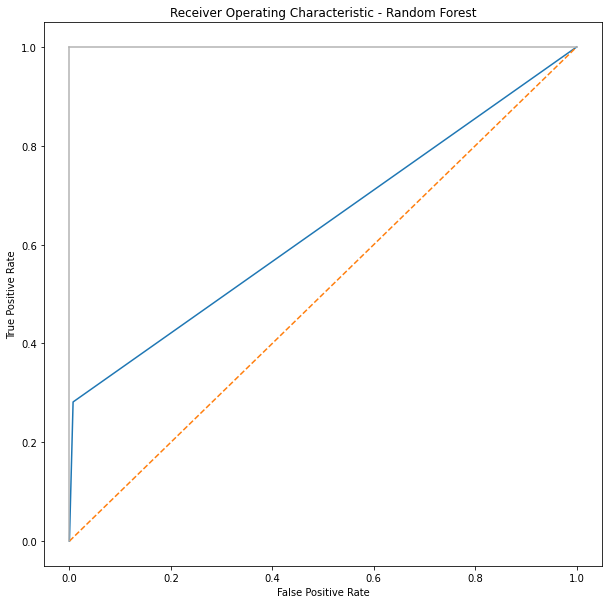

In [39]:
# Plotting the ROC curve for Random Forest model
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost method:

In [40]:
xg_model = xgb.XGBClassifier()

# Fitting the model on the training dataset
xg_model.fit(X_train,y_train)

# Printing the model
print(xg_model)

XGBClassifier()


In [41]:
# Prediction from the XGBoost model
xg_pred = xg_model.predict(X_test)

In [42]:
# Model Evaluation

print("Accuracy Score: ",accuracy_score(y_test,xg_pred))
print("F1 Score: ", f1_score(y_test,xg_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,xg_pred))
print("\n")
print("Classification report: \n", classification_report(y_test,xg_pred))
print("ROC_AUC score: ",roc_auc_score(y_test,xg_pred))

Accuracy Score:  0.9757575757575757
F1 Score:  0.44444444444444436
Confusion Matrix: 
 [[3188    9]
 [  71   32]]


Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3197
           1       0.78      0.31      0.44       103

    accuracy                           0.98      3300
   macro avg       0.88      0.65      0.72      3300
weighted avg       0.97      0.98      0.97      3300

ROC_AUC score:  0.653932236228746


#### Here approx 98% correct prediction has been made by the model. 
#### f1 score for non defaulters is 0.99 and for defaulters is 0.44

In [43]:
# ROC curve
false_positive_rate_xg, true_positive_rate_xg, threshold_xg = roc_curve(y_test, xg_pred)

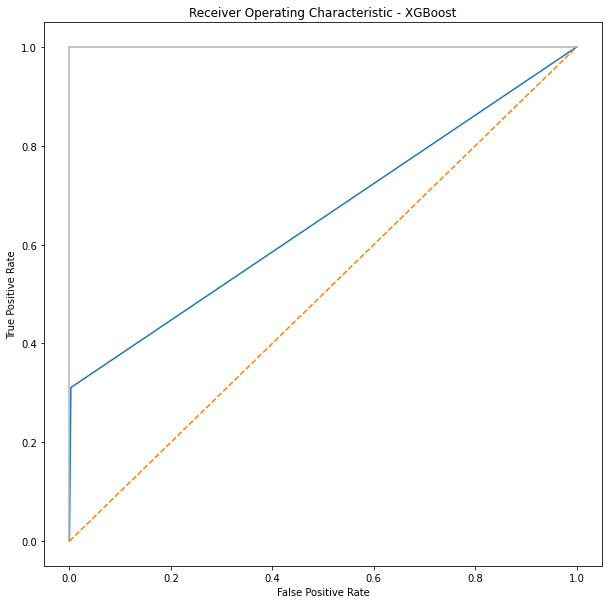

In [44]:
# Plotting the ROC curve for XGBoost model
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate_xg, true_positive_rate_xg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Comparing between the Random Forest model and the XGBoost model

In [45]:
# Comparing the Area Under the ROC curve for the two algorithms
print("ROC_AUC score for Random Forest model: ",roc_auc_score(y_test,rf_pred))
print("ROC_AUC score for XGBoost model: ",roc_auc_score(y_test,xg_pred))

ROC_AUC score for Random Forest model:  0.6371795767269679
ROC_AUC score for XGBoost model:  0.653932236228746


#### the area under the ROC curve is highes for XGBoost than Random Forest. So we can say that XGBoost is better for the Classification Task